🧪 Célula 1 – Importações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


📄 Célula 2 – Carregar Resultados dos Relatórios

In [2]:
relatorios = {}
modelos = ['xgb', 'rf', 'lgbm']

for modelo in modelos:
    with open(f"../reports/text/relatorio_{modelo}.txt", "r", encoding="utf-8") as f:
        relatorios[modelo] = f.read()

for nome, conteudo in relatorios.items():
    print(f"\n===== {nome.upper()} =====\n")
    print(conteudo)



===== XGB =====

              precision    recall  f1-score   support

           0     0.9597    0.9812    0.9703      2551
           1     0.8886    0.7848    0.8335       488

    accuracy                         0.9497      3039
   macro avg     0.9242    0.8830    0.9019      3039
weighted avg     0.9483    0.9497    0.9484      3039


===== RF =====

              precision    recall  f1-score   support

           0     0.9459    0.9804    0.9628      2551
           1     0.8734    0.7070    0.7814       488

    accuracy                         0.9365      3039
   macro avg     0.9097    0.8437    0.8721      3039
weighted avg     0.9343    0.9365    0.9337      3039


===== LGBM =====

              precision    recall  f1-score   support

           0     0.9582    0.9800    0.9690      2551
           1     0.8814    0.7766    0.8257       488

    accuracy                         0.9474      3039
   macro avg     0.9198    0.8783    0.8974      3039
weighted avg     0.9

📈 Célula 3 – Comparar AUC de Cada Modelo

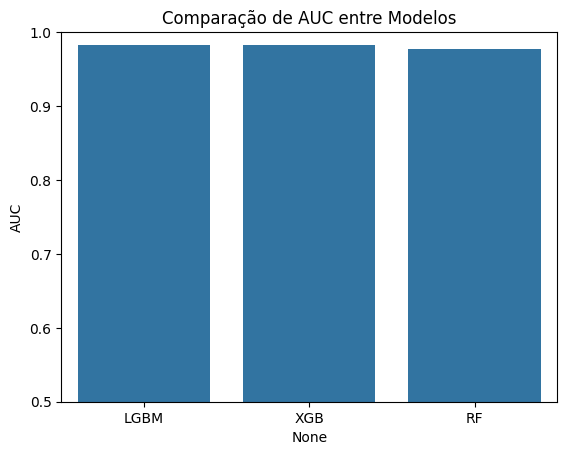

,AUC
LGBM,0.9826
XGB,0.9824
RF,0.9770


In [3]:
auc_values = {}

for modelo in modelos:
    with open(f"../reports/text/auc_{modelo}.txt", "r", encoding="utf-8") as f:
        auc_text = f.read().replace("AUC:", "").strip()
        auc_values[modelo.upper()] = float(auc_text)

df_auc = pd.DataFrame.from_dict(auc_values, orient='index', columns=['AUC']).sort_values(by="AUC", ascending=False)
sns.barplot(x=df_auc.index, y=df_auc['AUC'])
plt.title("Comparação de AUC entre Modelos")
plt.ylabel("AUC")
plt.ylim(0.5, 1.0)
plt.show()

df_auc
